In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os, sys
import time
import torch

In [5]:
sys.path.append("../")
from randman import NumpyRandman, TorchRandman, JaxRandman

In [6]:
res = []
for nb_samp in [1e2, 1e3, 1e4, 1e5, 1e6]:
    nb_samp = int(nb_samp)
    print(nb_samp)
    
    rm = NumpyRandman(1000,10)
    t0 = time.time()
    x,y = rm.get_random_manifold_samples(nb_samp)
    r_numpy = time.time()-t0
    print("NumPy: %fs"%(r_numpy))
    
    rm = TorchRandman(1000,10)
    t0 = time.time()
    x,y = rm.get_random_manifold_samples(nb_samp)
    r_torch = time.time()-t0
    print("Torch: %fs"%(r_torch))

    device=torch.device("cuda:1") # use the second GPU to avoid memory conflict with Jax
    rm = TorchRandman(1000,10,device=device)
    t0 = time.time()
    x,y = rm.get_random_manifold_samples(nb_samp)
    r_gpu = time.time()-t0
    print("GPU: %fs"%(r_gpu))
    
    rm = JaxRandman(1000,10)
    t0 = time.time()
    x,y = rm.get_random_manifold_samples(nb_samp)
    r_jax = time.time()-t0
    print("Jax: %fs"%(r_jax))
    
    res.append((nb_samp, r_numpy, r_torch, r_gpu, r_jax))

100
NumPy: 1.911916s
Torch: 11.328279s
GPU: 19.100632s
Jax: 0.837230s
1000
NumPy: 2.899556s
Torch: 11.833035s
GPU: 18.965090s
Jax: 0.498703s
10000
NumPy: 11.075665s
Torch: 16.355498s
GPU: 19.122219s
Jax: 0.748565s
100000
NumPy: 170.821607s
Torch: 83.281230s
GPU: 19.216339s
Jax: 4.499739s
1000000
NumPy: 2850.005519s
Torch: 469.747216s
GPU: 88.796489s
Jax: 101.508937s


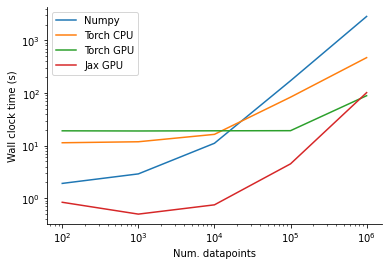

In [7]:
dat=np.array(res)
plt.plot(dat[:,0],dat[:,1:])
plt.legend(labels=["Numpy", "Torch CPU", "Torch GPU", "Jax GPU"])
plt.xlabel("Num. datapoints")
plt.ylabel("Wall clock time (s)")
plt.loglog()
sns.despine()